# TASK 1: PROJECT OVERVIEW & KEY LEARNING OBJECTIVES

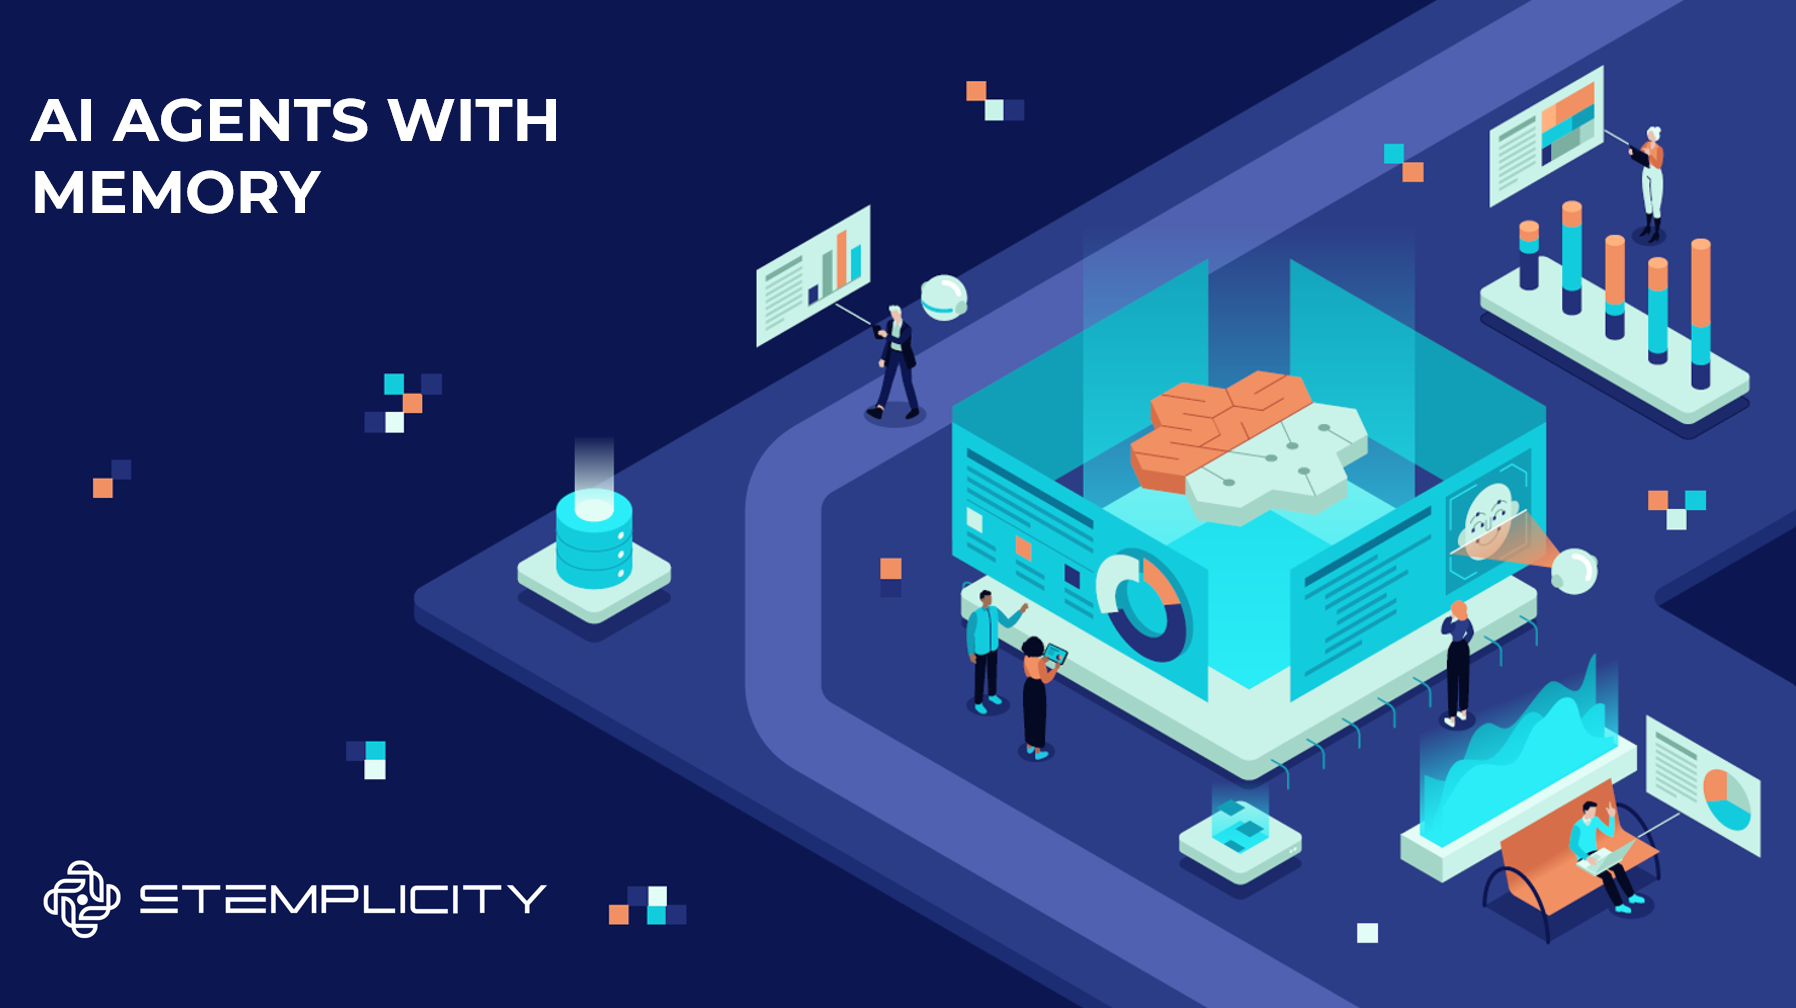

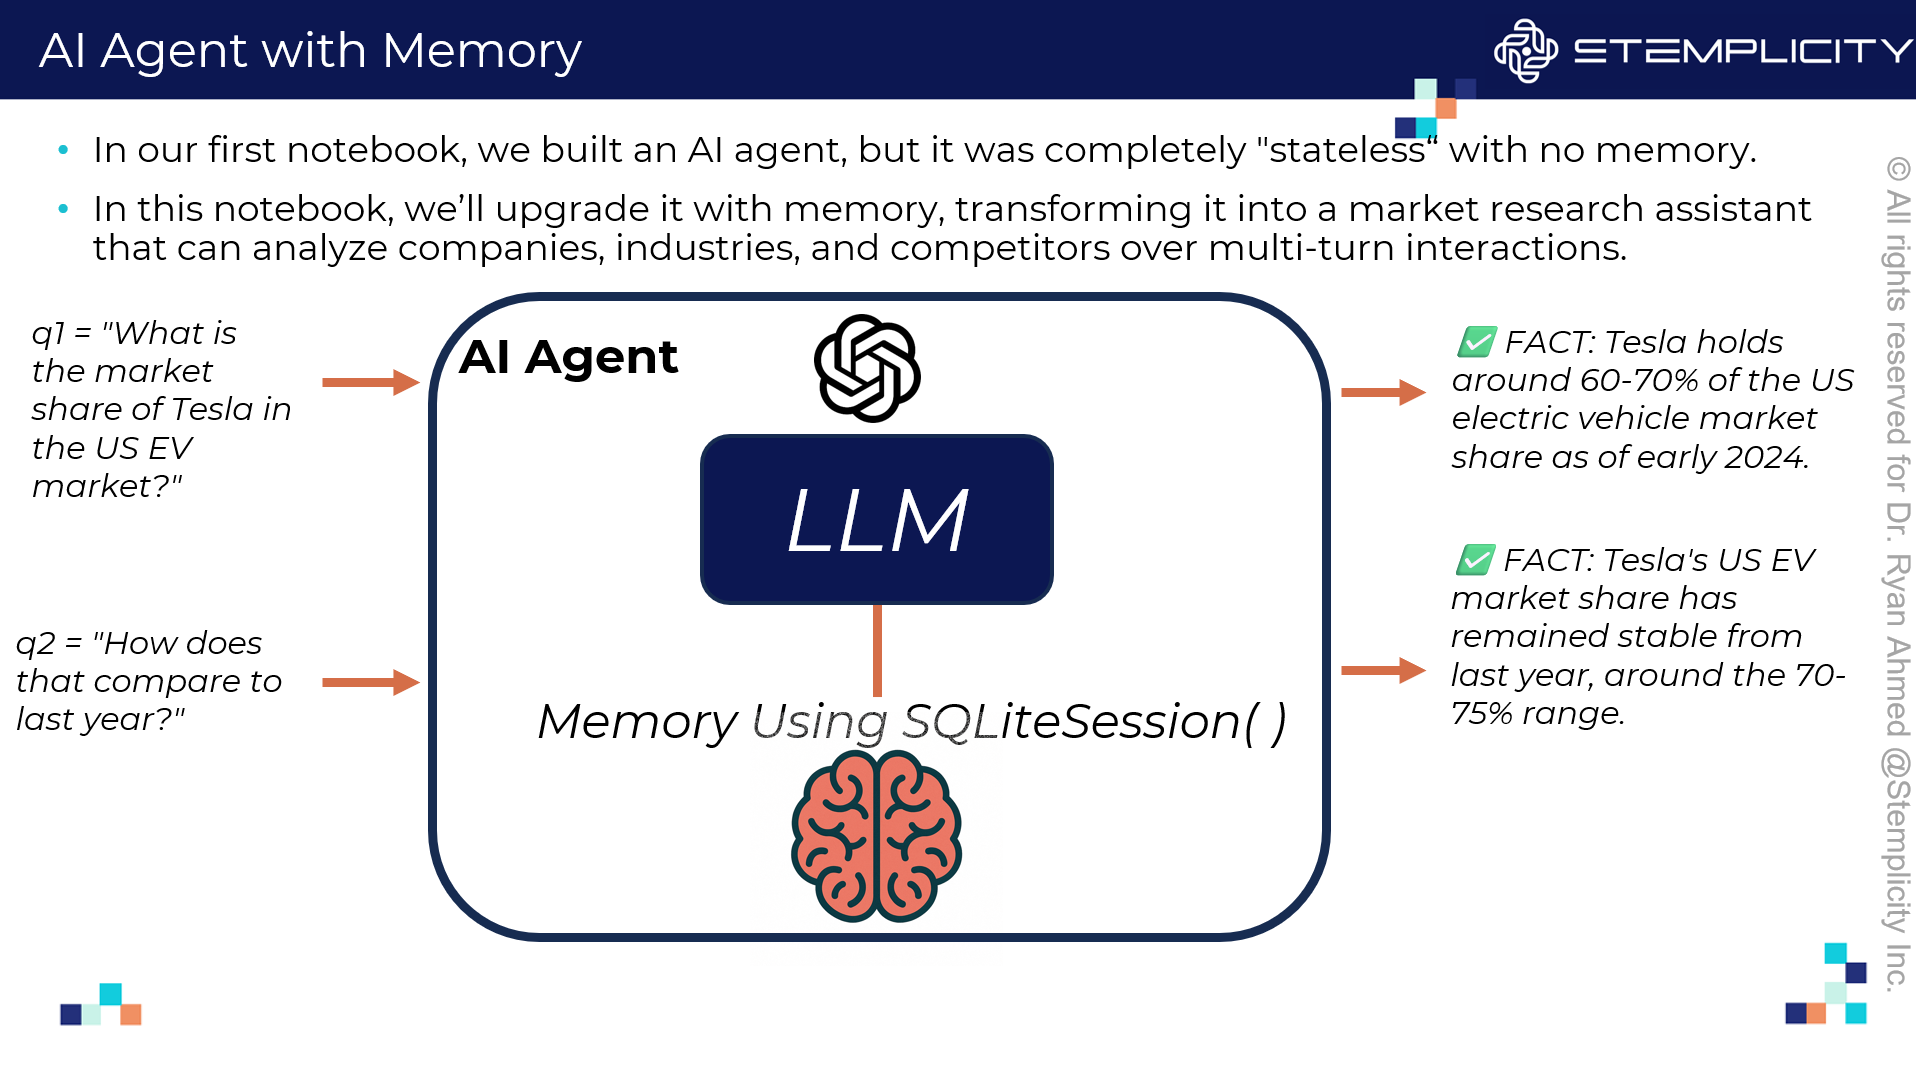

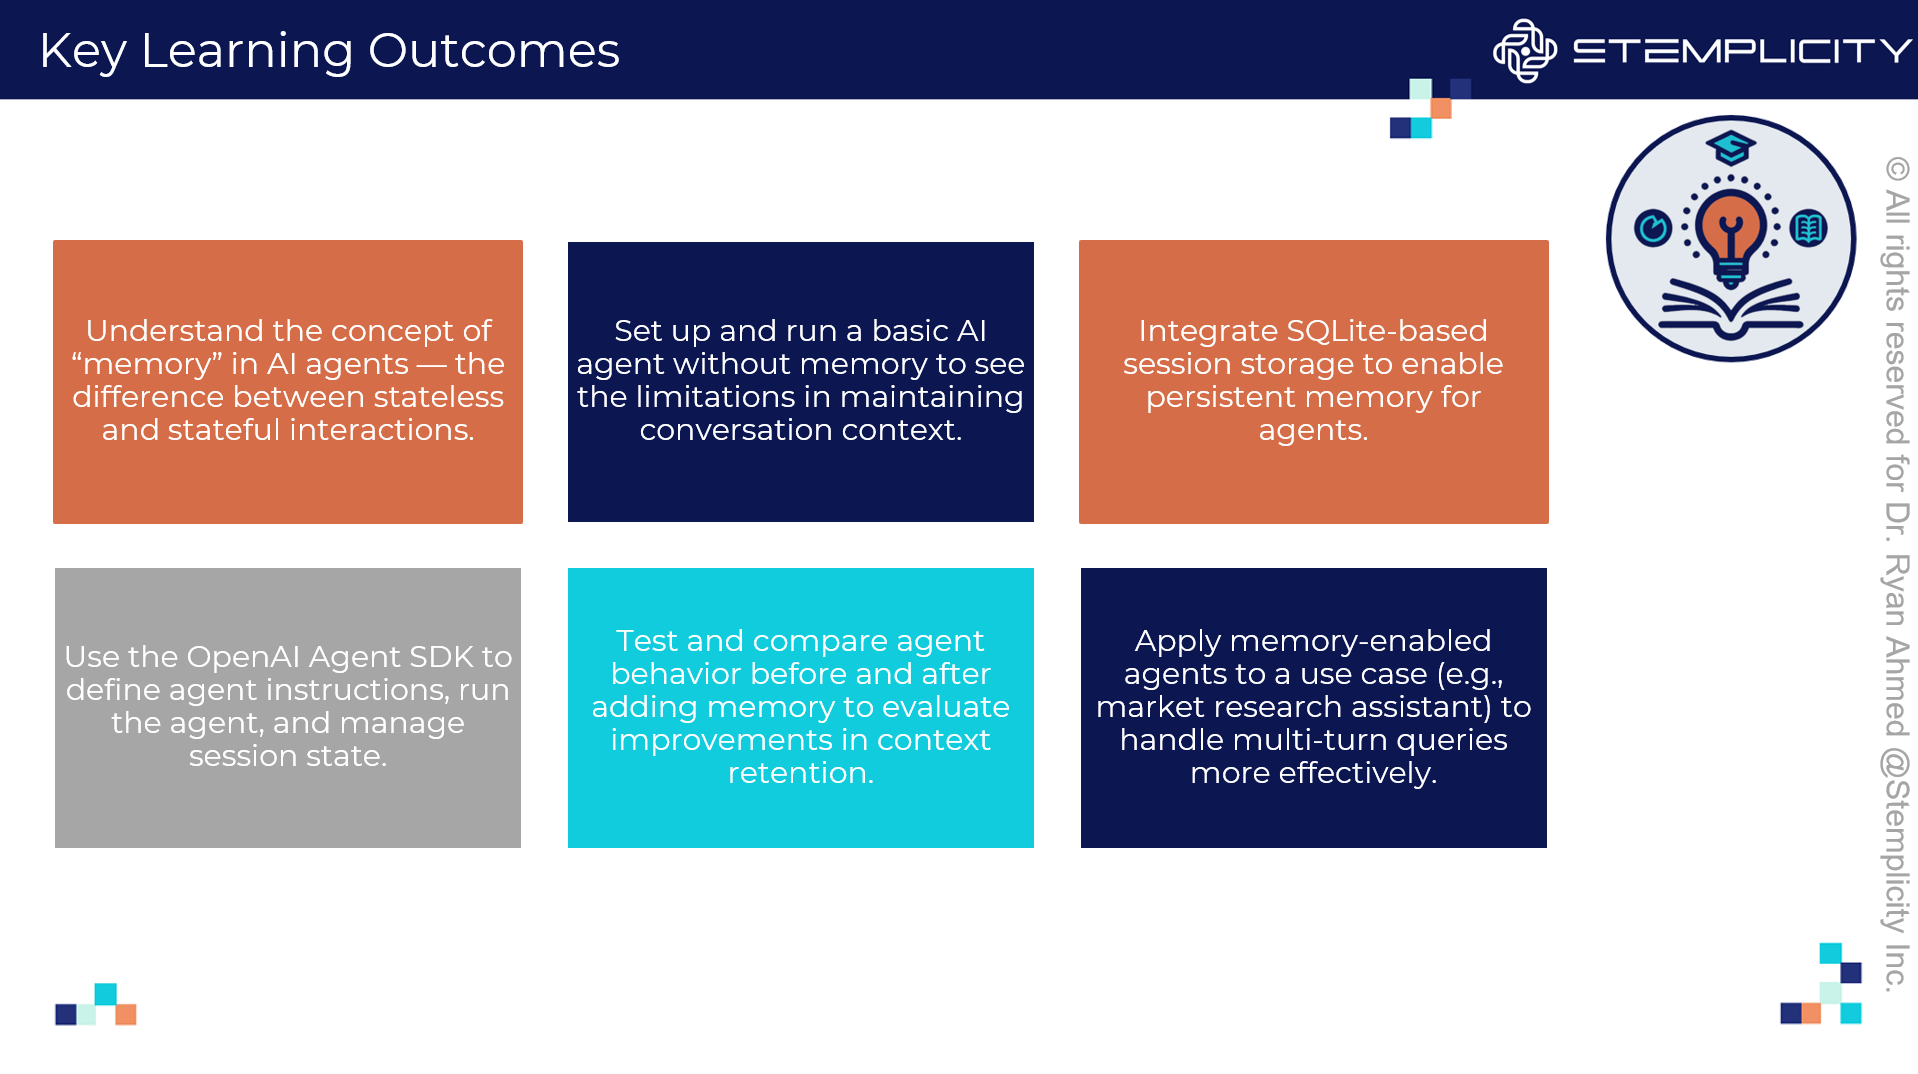

# TASK 2: SETTING UP YOUR ENVIRONMENT & BUILD AN AGENT WITH NO MEMORY


In [ ]:
import os
from openai import OpenAI
from dotenv import load_dotenv
from IPython.display import display, Markdown

# Load environment variables and configure client
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
openai_client = OpenAI(api_key = openai_api_key)

print("OpenAI client configured.")

In [ ]:
# Define a function for printing markdown cells
def print_markdown(text):
    display(Markdown(text))

In [ ]:
# Import required classes from the agents module
# Agent: Represents an AI agent with a specific role and instructions
# Runner: Executes the agent and handles interactions
# SQLiteSession: Provides persistent memory storage for the agent using SQLite

from agents import Agent, Runner, SQLiteSession

# Define the role and instructions for the AI agent
market_researcher_instructions = """
Context:
You are a market research assistant helping analyze companies, industries, and competitors.

Instructions:
When given a question, provide a short factual answer based on your knowledge.

Output:
Start with a verdict prefix: either "✅ FACT:" or "❌ UNKNOWN:"
Follow with a concise one-sentence explanation.
"""

# Create an instance of the Agent
market_researcher_agent = Agent(name = "Market Researcher",
                                instructions = market_researcher_instructions,
                                model = "gpt-4.1-mini")

In [ ]:
# Example: An AI Agent with NO memory

# Let's give our first question to the AI agent
q1 = "What is the market share of Tesla in the US EV market?"

# Display the user’s question in Markdown format
print_markdown(f"You: '{q1}'")

# Run the agent with the first question (no memory means each query is independent)
resp1 = await Runner.run(starting_agent = market_researcher_agent, input = q1)

# Display the agent’s response
print_markdown(f"🤖 Agent:\n{resp1.final_output}")

In [ ]:
# Second question — depends on previous context
# Follow-up question that refers to the previous answer
q2 = "How does that compare to last year?"

# Display the follow-up question
print_markdown(f"\nYou: '{q2}'")

# Run the agent again — since there’s no memory, it does not recall the first question/answer
resp2 = await Runner.run(starting_agent = market_researcher_agent, input = q2)

# Display the agent’s response (will fail to connect it to the first question)
print_markdown(f"🤖 Agent:\n{resp2.final_output}")

🛑 As expected, the agent has **no memory**.

# TASK 3: ADDING MEMORY WITH SQLITESESSION

In [ ]:
# Create a session instance
# SQLite-based implementation of session storage.
# This implementation stores conversation history in a SQLite database. 

session = SQLiteSession("conversation")

# First interaction
user_input1 = "What is the market share of Tesla in the US EV market?"
response1 = await Runner.run(
    starting_agent = market_researcher_agent,
    input = user_input1,
    session = session,
)

print_markdown(f"🤖 Agent:\n{response1.final_output}")

In [ ]:
# Second interaction with history
user_input2 = "How does that compare to last year?"

response2 = await Runner.run(
    starting_agent = market_researcher_agent,
    input = user_input2,
    session = session,
) 

print_markdown(f"🤖 Agent:\n{response2.final_output}")

✅ Success! Now the agent **remembers Tesla** because we provided the history ourselves.

**PRACTICE OPPORTUNITY:**  
- **Using OpenAI Agents SDK, create a new AI agent named `Travel Planner` that always suggests one sunny (warm) weekend getaway destination.**  
    - **1. Write the agent’s instructions; tell it to only give one sunny/warm destination.**  
    - **2. Use the latest `gpt-5-mini` model.**  
    - **3. Save the conversation history with `SQLiteSession` so it remembers past user questions and doesn’t repeat destinations.**  
    - **4. Ask the agent:**  
      **`Please suggest one weekend destination within 5 hours flying from Toronto, Canada`**  
    - **5. Display the agent’s answer.**  
    - **6. Then ask a follow-up question about visa requirements for Canadians for that destination and display the answer.**  
    - **Hint: Use `Runner.run()` to send the message to the agent and print the reply.**  

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**  
- **Using OpenAI Agents SDK, create a new AI agent named `Travel Planner` that always suggests one sunny (warm) weekend getaway destination.**  
    - **1. Write the agent’s instructions; tell it to only give one sunny/warm destination.**  
    - **2. Use the latest `gpt-5-mini` model.**  
    - **3. Save the conversation history with `SQLiteSession` so it remembers past user questions and doesn’t repeat destinations.**  
    - **4. Ask the agent:**  
      **`Please suggest one weekend destination within 5 hours flying from Toronto, Canada`**  
    - **5. Display the agent’s answer.**  
    - **6. Then ask a follow-up question about visa requirements for Canadians for that destination and display the answer.**  
    - **Hint: Use `Runner.run()` to send the message to the agent and print the reply.**  

In [ ]:
from agents import Agent, Runner, SQLiteSession

travel_planner_instructions = """You are an assistant specializing in weekend travel planning.
Always suggest exactly ONE sunny (warm) destination for a quick getaway.
"""

In [ ]:
# Define agent
travel_planner_agent = Agent(name = "Travel Planner",
                             instructions = travel_planner_instructions,
                             model = "gpt-5-mini")

In [ ]:
session = SQLiteSession("travel_planner_session")

travel_msg = """Please suggest one weekend destination within 5 hours flying from Toronto, Canada"""

resp1_travel = await Runner.run(starting_agent = travel_planner_agent,
                                         input = travel_msg,
                                         session = session)

print_markdown(f"Travel Planner:\n{resp1_travel.final_output}")


In [ ]:
followup_travel = "What are the visa requirements for Canadians to this destination?"

resp2_travel = await Runner.run(
    starting_agent = travel_planner_agent,
    input = followup_travel,
    session = session
)

print_markdown(f"Travel Planner:\n{resp2_travel.final_output}")

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

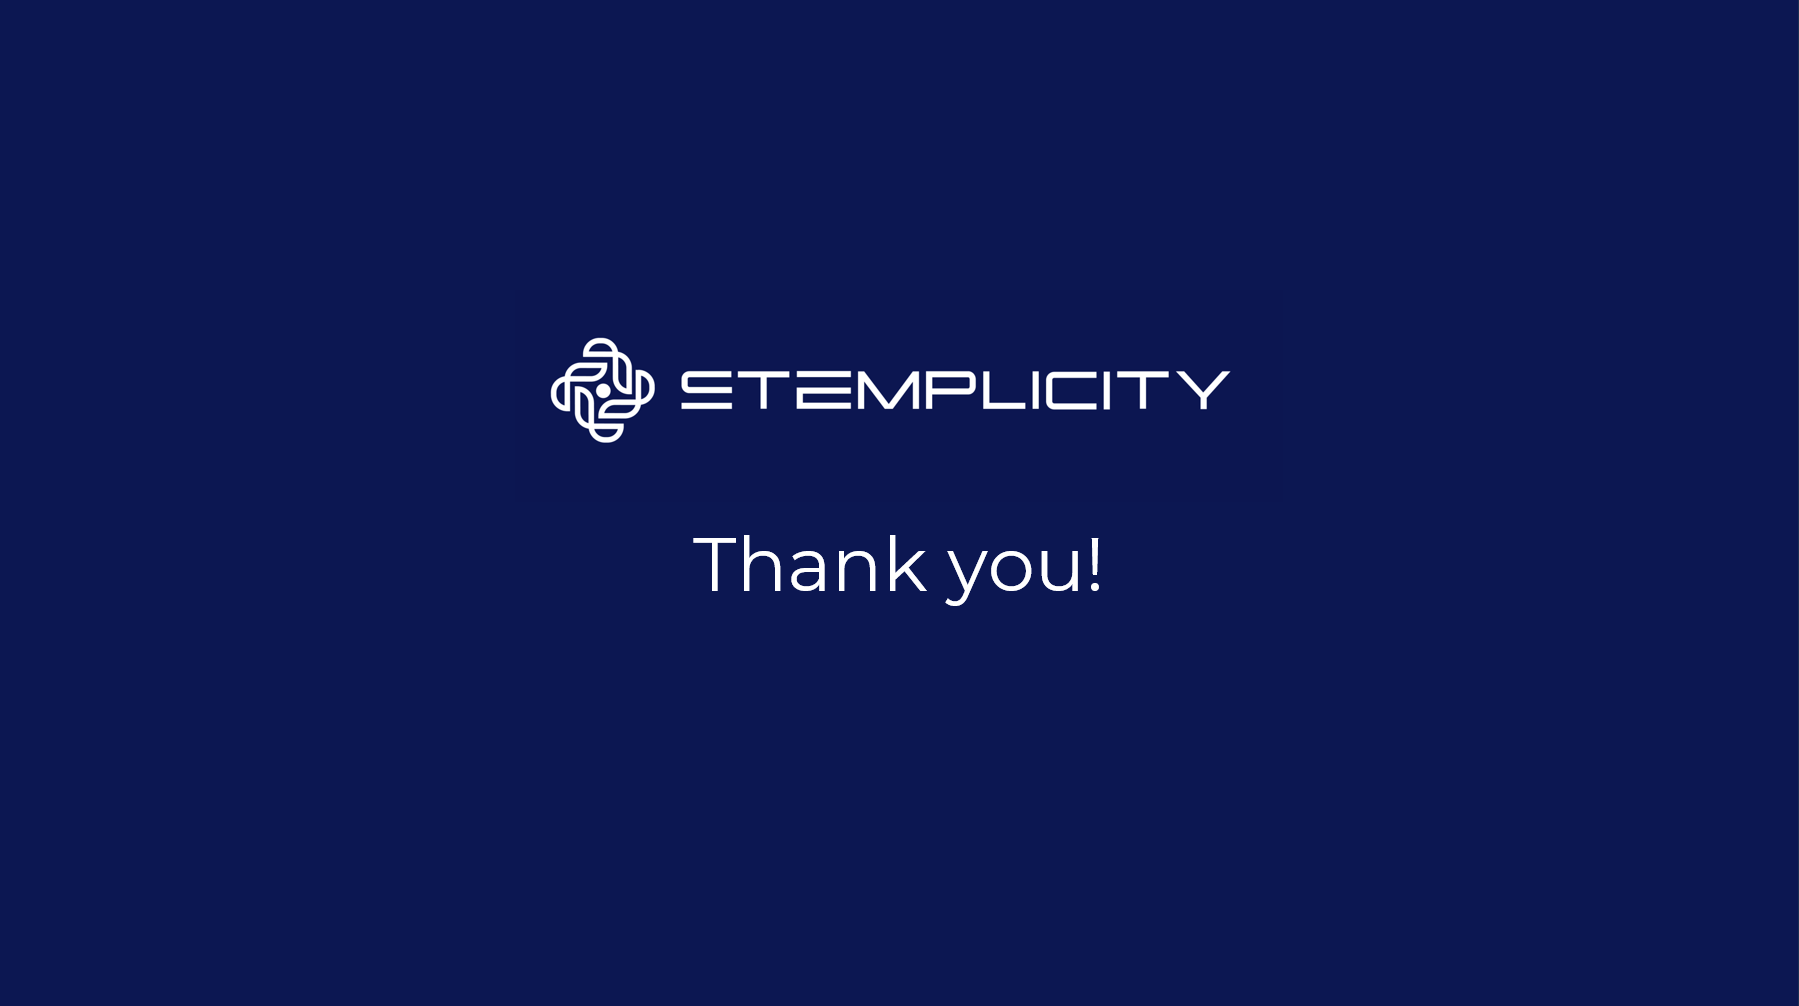